In [31]:
import scipy.stats as sts #Для работы с вероятностными 
import numpy as np #Для работы с массивами 
import pandas as pd # Для работы с данными в виде таблиц
import matplotlib.pyplot as plt #Для построения графиков
%pylab inline 
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm, kstest, shapiro
import warnings

# Настройки отображения
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid")


# Управление предупреждениями
warnings.filterwarnings('ignore')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [33]:
# Загрузка данных компании K1
K1 = pd.read_csv('K1.txt', sep=';', header=0)
K1.head(2)  # вывод первых двух строк таблицы
# Удаление признаков: <TICKER>, <PER> и <TIME>
K1 = K1.drop(['<TICKER>', '<PER>', '<TIME>'], axis=1)
K1.head(2)
# Переименовывание столбцов
K1.rename(columns={'<DATE>': 'Дата'}, inplace=True)
K1.rename(columns={'<CLOSE>': 'K1-Цена'}, inplace=True)
K1.rename(columns={'<VOL>': 'K1-Объем'}, inplace=True)
K1.head(2)

,Дата,K1-Цена,K1-Объем
0,29/02/08,2080,12991
1,01/03/08,2080,0


In [35]:
# Загрузка данных компании K2
K2 = pd.read_csv('K2.txt', sep=';', header=0)
K2.head(2)  # вывод первых двух строк таблицы
# Удаление признаков: <TICKER>, <PER> и <TIME>
K2 = K2.drop(['<TICKER>', '<PER>', '<TIME>'], axis=1)
K2.head(2)
# Переименовывание столбцов
K2.rename(columns={'<DATE>': 'Дата'}, inplace=True)
K2.rename(columns={'<CLOSE>': 'K2-Цена'}, inplace=True)
K2.rename(columns={'<VOL>': 'K2-Объем'}, inplace=True)
K2.head(2)

,Дата,K2-Цена,K2-Объем
0,29/02/08,"22,1",91675800
1,01/03/08,"22,1",0


In [37]:
# Загрузка данных компании K3
K3 = pd.read_csv('K3.txt', sep=';', header=0)
K3.head(2)  # вывод первых двух строк таблицы
# Удаление признаков: <TICKER>, <PER> и <TIME>
K3 = K3.drop(['<TICKER>', '<PER>', '<TIME>'], axis=1)
K3.head(2)
# Переименовывание столбцов
K3.rename(columns={'<DATE>': 'Дата'}, inplace=True)
K3.rename(columns={'<CLOSE>': 'K3-Цена'}, inplace=True)
K3.rename(columns={'<VOL>': 'K3-Объем'}, inplace=True)
K3.head(2)

,Дата,K3-Цена,K3-Объем
0,29/02/08,624,903375
1,01/03/08,624,0


In [39]:
display("K1:", K1.head(2))
display("K2:", K2.head(2))
display("K3:", K3.head(2))

'K1:'

,Дата,K1-Цена,K1-Объем
0,29/02/08,2080,12991
1,01/03/08,2080,0


'K2:'

,Дата,K2-Цена,K2-Объем
0,29/02/08,"22,1",91675800
1,01/03/08,"22,1",0


'K3:'

,Дата,K3-Цена,K3-Объем
0,29/02/08,624,903375
1,01/03/08,624,0


In [41]:
# Удаление столбца "Дата" из K2 и K3
K2U = K2.drop(['Дата'], axis=1)
K3U = K3.drop(['Дата'], axis=1)

# Объединение таблиц
K123 = pd.concat([K1, K2U, K3U], axis=1)
K123.head(10)

,Дата,K1-Цена,K1-Объем,K2-Цена,K2-Объем,K3-Цена,K3-Объем
0,29/02/08,2080,12991,"22,1",91675800,624,903375
1,01/03/08,2080,0,"22,1",0,624,0
2,02/03/08,2080,0,"22,1",0,624,0
3,03/03/08,2059,5417,"21,27",116077300,"608,6",551939
4,04/03/08,2050,3386,21,131777600,618,377656
5,05/03/08,"2000,03",20163,"21,966",120639300,628,182838
6,06/03/08,1822,45409,"21,961",114155000,"634,3",284920
7,07/03/08,"1794,98",13622,"21,851",75043600,"621,9",460150
8,08/03/08,"1794,98",0,"21,851",0,"621,9",0
9,09/03/08,"1794,98",0,"21,851",0,"621,9",0


In [43]:
# Удаление строк с пропущенными и нулевыми данными
K1['K1-Объем'].replace(0, np.nan, inplace=True)
K1.dropna(axis=0, inplace=True)
K1.shape

(3621, 3)

In [45]:
K2['K2-Объем'].replace(0, np.nan, inplace=True)
K2.dropna(axis=0, inplace=True)
K2.shape

(3624, 3)

In [47]:
K3['K3-Объем'].replace(0, np.nan, inplace=True)
K3.dropna(axis=0, inplace=True)
K3.shape

(3623, 3)

In [49]:
K123['K1-Объем'].replace(0, np.nan, inplace=True)
K123.dropna(axis=0, inplace=True)
K123.shape

K123['K2-Объем'].replace(0, np.nan, inplace=True)
K123.dropna(axis=0, inplace=True)
K123.shape

K123['K3-Объем'].replace(0, np.nan, inplace=True)
K123.dropna(axis=0, inplace=True)
K123.shape

(3621, 7)

In [51]:
import numpy as np
import pandas as pd

# 1. Проверка и преобразование типов данных
def convert_to_float(series):
    """Преобразует столбец в float, заменяя запятые на точки"""
    if series.dtype == object:
        return series.str.replace(',', '.').astype(float)
    return series

# Применяем ко всем столбцам с ценами
for col in ['K1-Цена', 'K2-Цена', 'K3-Цена']:
    K123[col] = convert_to_float(K123[col])

# 2. Удаление нулевых значений
for col in ['K1-Цена', 'K2-Цена', 'K3-Цена']:
    K123[col].replace(0, np.nan, inplace=True)
K123.dropna(subset=['K1-Цена', 'K2-Цена', 'K3-Цена'], inplace=True)

# 3. Расчет логдоходностей с проверкой
def calculate_log_return(price_series):
    """Безопасный расчет логдоходности"""
    try:
        return np.log(price_series / price_series.shift(1))
    except Exception as e:
        print(f"Ошибка при расчете: {e}")
        return None

K123['K1-Логдоходность'] = calculate_log_return(K123['K1-Цена'])
K123['K2-Логдоходность'] = calculate_log_return(K123['K2-Цена'])
K123['K3-Логдоходность'] = calculate_log_return(K123['K3-Цена'])

# 4. Удаление строк с пропусками после расчета
K123.dropna(subset=['K1-Логдоходность', 'K2-Логдоходность', 'K3-Логдоходность'], inplace=True)

# Проверка результатов
print(K123[['K1-Цена', 'K2-Цена', 'K3-Цена', 
           'K1-Логдоходность', 'K2-Логдоходность', 'K3-Логдоходность']].head())


   K1-Цена  K2-Цена  K3-Цена  K1-Логдоходность  K2-Логдоходность  \
3  2059.00    21.27   608.60             -0.01             -0.04   
4  2050.00    21.00   618.00             -0.00             -0.01   
5  2000.03    21.97   628.00             -0.02              0.04   
6  1822.00    21.96   634.30             -0.09             -0.00   
7  1794.98    21.85   621.90             -0.01             -0.01   

   K3-Логдоходность  
3             -0.02  
4              0.02  
5              0.02  
6              0.01  
7             -0.02  


In [53]:
import pandas as pd
import numpy as np

# 1. Функция для преобразования данных
def prepare_column(df, col_name):
    """Преобразует столбец в числовой формат, заменяя запятые на точки"""
    if df[col_name].dtype == object:
        # Заменяем запятые на точки и преобразуем в float
        df[col_name] = df[col_name].astype(str).str.replace(',', '.').astype(float)
    return df

# 2. Обработка данных для K1, K2, K3
for df in [K1, K2, K3]:
    # Преобразуем цену и объем
    prefix = [col.split('-')[0] for col in df.columns if '-Цена' in col][0]
    df = prepare_column(df, f'{prefix}-Цена')
    df = prepare_column(df, f'{prefix}-Объем')

# 3. Расчет логдоходностей с проверкой
def calculate_returns(df, prefix):
    price_col = f'{prefix}-Цена'
    return_col = f'{prefix}-Логдоходность'
    
    try:
        # Проверяем, что цена не содержит нулей или пропущенных значений
        df[price_col].replace(0, np.nan, inplace=True)
        df.dropna(subset=[price_col], inplace=True)
        
        # Рассчитываем логдоходность
        df[return_col] = np.log(df[price_col] / df[price_col].shift(1))
        
        # Удаляем строки с нулевой доходностью
        df[return_col].replace(0, np.nan, inplace=True)
        df.dropna(subset=[return_col], inplace=True)
        
        print(f"Успешно рассчитаны доходности для {prefix}")
    except Exception as e:
        print(f"Ошибка при расчете доходностей для {prefix}: {str(e)}")
    
    return df

# Применяем для всех датафреймов
K1 = calculate_returns(K1, 'K1')
K2 = calculate_returns(K2, 'K2')
K3 = calculate_returns(K3, 'K3')

# 4. Проверка результатов
print("\nРезультаты:")
print("K1 размер:", K1.shape)
print("K2 размер:", K2.shape)
print("K3 размер:", K3.shape)

# 5. Объединение данных (если нужно)
K123 = pd.concat([
    K1.set_index('Дата'),
    K2.set_index('Дата')[['K2-Цена', 'K2-Объем', 'K2-Логдоходность']],
    K3.set_index('Дата')[['K3-Цена', 'K3-Объем', 'K3-Логдоходность']]
], axis=1).reset_index()

display(K123.head())

Успешно рассчитаны доходности для K1
Успешно рассчитаны доходности для K2
Успешно рассчитаны доходности для K3

Результаты:
K1 размер: (3529, 4)
K2 размер: (3597, 4)
K3 размер: (3609, 4)


,Дата,K1-Цена,K1-Объем,K1-Логдоходность,K2-Цена,K2-Объем,K2-Логдоходность,K3-Цена,K3-Объем,K3-Логдоходность
0,03/03/08,2059.00,5417.00,-0.01,21.27,116077300.00,-0.04,608.60,551939.00,-0.02
1,04/03/08,2050.00,3386.00,-0.00,21.00,131777600.00,-0.01,618.00,377656.00,0.02
2,05/03/08,2000.03,20163.00,-0.02,21.97,120639300.00,0.04,628.00,182838.00,0.02
3,06/03/08,1822.00,45409.00,-0.09,21.96,114155000.00,-0.00,634.30,284920.00,0.01
4,07/03/08,1794.98,13622.00,-0.01,21.85,75043600.00,-0.01,621.90,460150.00,-0.02


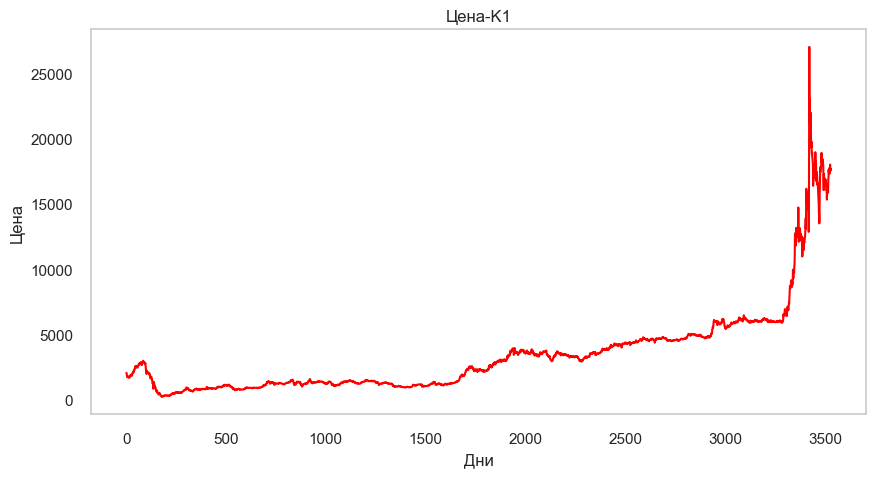

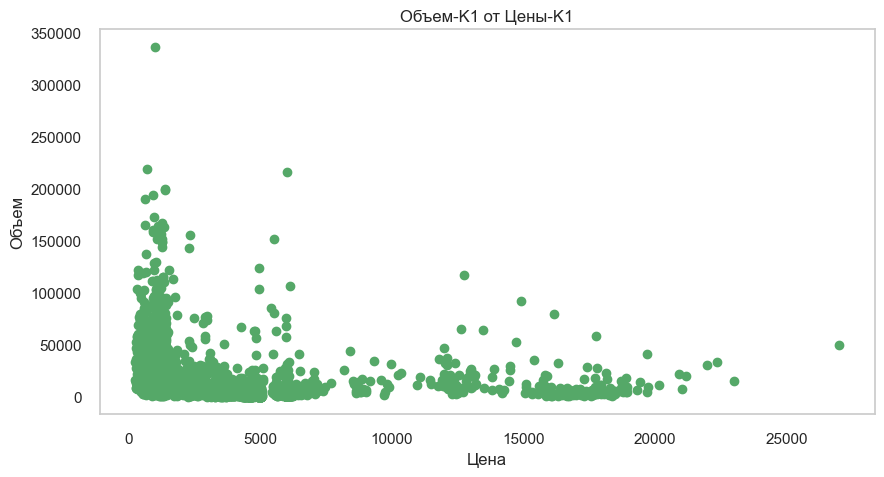

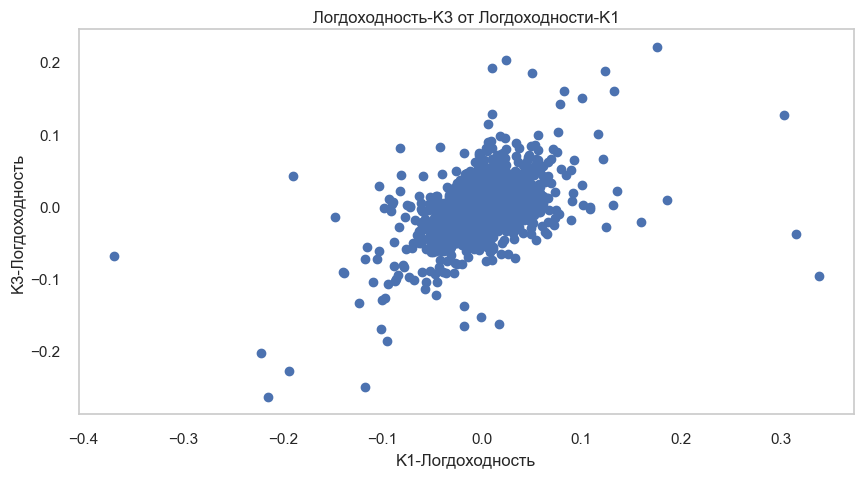

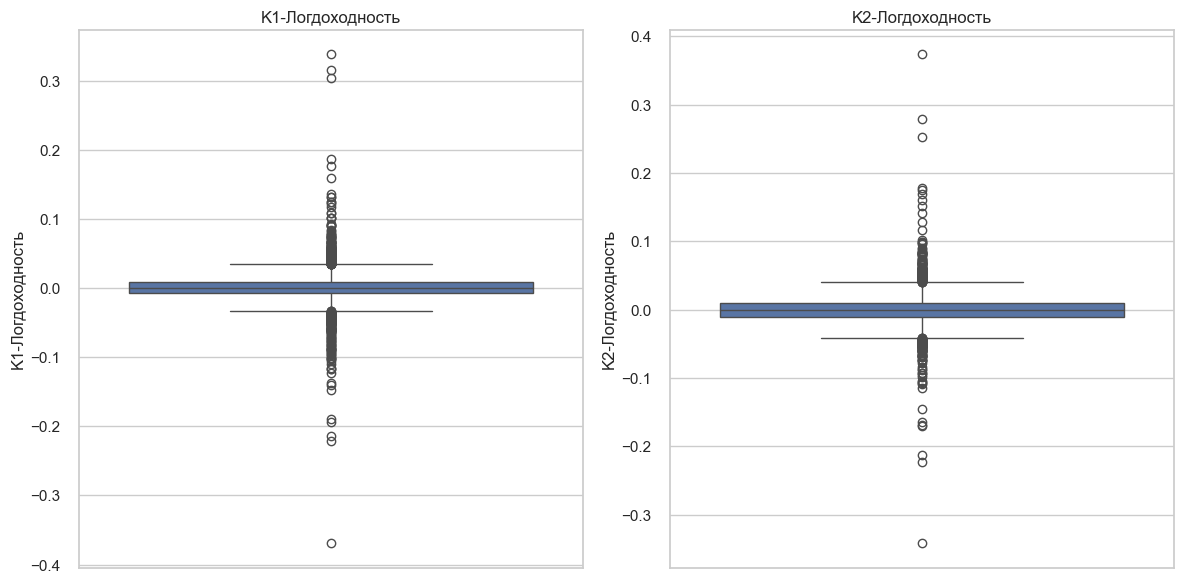

In [55]:
# График цены компании K1
plt.figure(figsize=(10, 5))
n_day = np.linspace(1, len(K1['K1-Цена']) + 1, len(K1['K1-Цена']))
plt.plot(n_day, K1['K1-Цена'], c="red")
plt.title("Цена-K1")
plt.xlabel('Дни')
plt.ylabel('Цена')
plt.grid()
plt.show()

# Диаграмма рассеяния для K1-Цена и K1-Объем
plt.figure(figsize=(10, 5))
plt.scatter(K1['K1-Цена'], K1['K1-Объем'], c="g")
plt.title("Объем-K1 от Цены-K1")
plt.xlabel('Цена')
plt.ylabel('Объем')
plt.grid()
plt.show()

# Диаграмма рассеяния для логдоходностей
# Создаем DataFrame с логдоходностями
LogIncom = K123[['K1-Логдоходность', 'K3-Логдоходность']].dropna()
LogIncom.columns = ['K1-Логдох', 'K3-Логдох']  # если хочешь оставить короткие имена

# Диаграмма рассеяния для логдоходностей
plt.figure(figsize=(10, 5))
plt.scatter(LogIncom['K1-Логдох'], LogIncom['K3-Логдох'], c="b")
plt.title("Логдоходность-K3 от Логдоходности-K1")
plt.xlabel('K1-Логдоходность')
plt.ylabel('K3-Логдоходность')
plt.grid()
plt.show()


# Диаграмма размаха логдоходности
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=K1["K1-Логдоходность"])
plt.title("K1-Логдоходность")

plt.subplot(1, 2, 2)
sns.boxplot(y=K2["K2-Логдоходность"])
plt.title("K2-Логдоходность")

plt.tight_layout()
plt.show()

K1: 0.0005924112365355854 0.026744759766981235
K2: 0.00011259130083470142 0.026147023523908568
K3: 0.00020469693062455336 0.027571381690420855


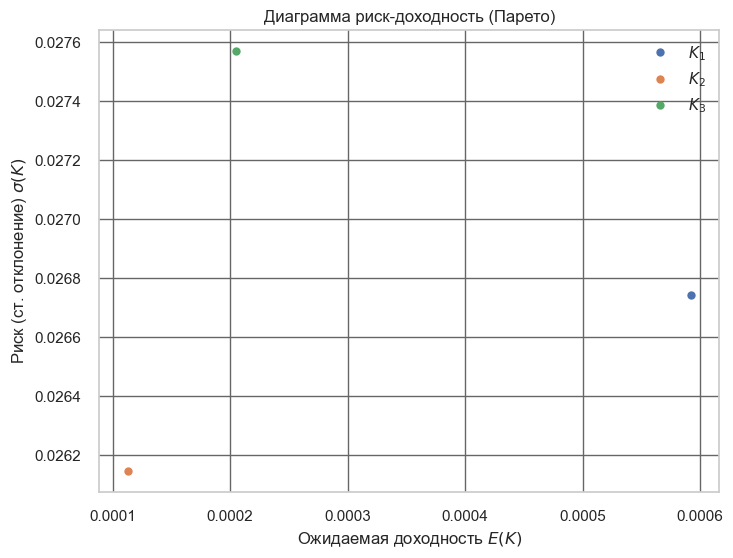

In [56]:
# Создаем DataFrame с логдоходностями всех компаний
LogIncom = K123[['K1-Логдоходность', 'K2-Логдоходность', 'K3-Логдоходность']].dropna()
LogIncom.columns = ['K1-Логдох', 'K2-Логдох', 'K3-Логдох']  # для удобства

# Расчёт средних и стандартных отклонений
m1, s1 = LogIncom["K1-Логдох"].mean(), LogIncom["K1-Логдох"].std()
print("K1:", m1, s1)

m2, s2 = LogIncom["K2-Логдох"].mean(), LogIncom["K2-Логдох"].std()
print("K2:", m2, s2)

m3, s3 = LogIncom["K3-Логдох"].mean(), LogIncom["K3-Логдох"].std()
print("K3:", m3, s3)

# График риск-доходность (Парето)
plt.figure(figsize=(8, 6))
plt.plot([m1], [s1], 'o', label='$K_1$')
plt.plot([m2], [s2], 'o', label='$K_2$')
plt.plot([m3], [s3], 'o', label='$K_3$')
plt.legend()
plt.xlabel('Ожидаемая доходность $E(K)$')
plt.ylabel('Риск (ст. отклонение) $\sigma(K)$')
plt.title('Диаграмма риск-доходность (Парето)')
plt.grid(True, linestyle='-', color='0.4')
plt.show()


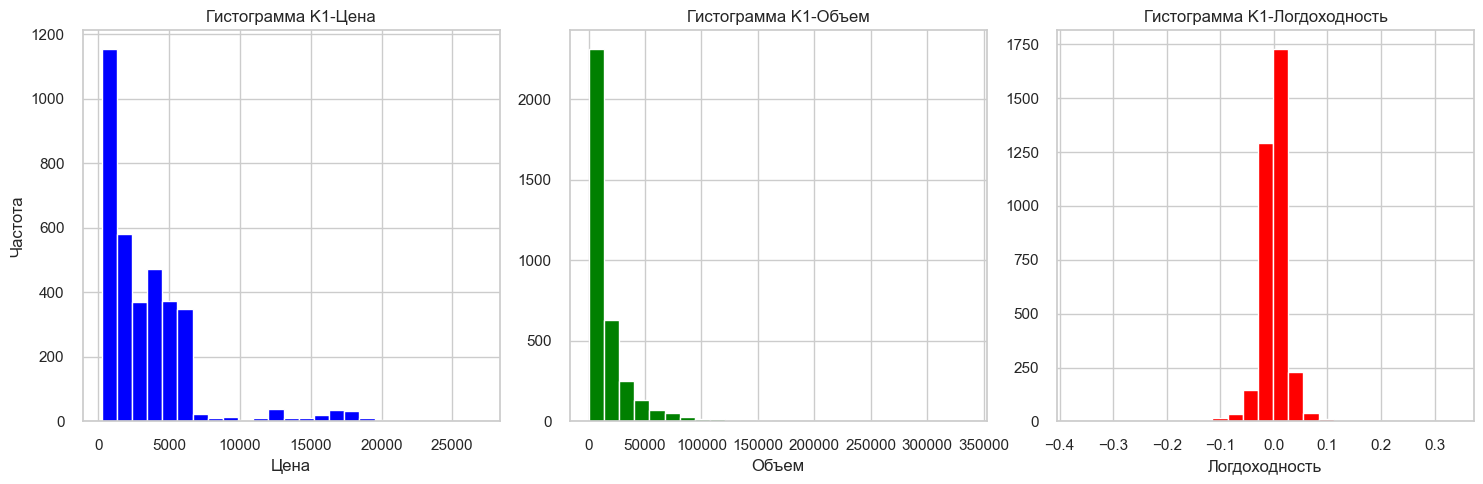

In [57]:
import matplotlib.pyplot as plt

# Настройка общего размера области для графиков
plt.figure(figsize=(15, 5))

# Гистограмма K1-Цена
plt.subplot(1, 3, 1)  # 1 строка, 3 столбца, 1-й график
plt.hist(K1["K1-Цена"], bins=25, edgecolor='white', color='blue')
plt.title("Гистограмма K1-Цена")
plt.xlabel("Цена")
plt.ylabel("Частота")

# Гистограмма K1-Объем
plt.subplot(1, 3, 2)  # 1 строка, 3 столбца, 2-й график
plt.hist(K1["K1-Объем"], bins=25, edgecolor='white', color='green')
plt.title("Гистограмма K1-Объем")
plt.xlabel("Объем")

# Гистограмма K1-Логдоходность
plt.subplot(1, 3, 3)  # 1 строка, 3 столбца, 3-й график
plt.hist(K1["K1-Логдоходность"], bins=25, edgecolor='white', color='red')
plt.title("Гистограмма K1-Логдоходность")
plt.xlabel("Логдоходность")

plt.tight_layout()  # Чтобы подписи не накладывались
plt.show()

In [58]:
# Описательная статистика
sts.describe(K1["K1-Цена"])
K1["K1-Цена"].describe()

def descrstat(x):
    tab = np.zeros(5) # Создаем массив из 5 нулей для хранения результатов
    tab[0] = np.mean(x) # Среднее арифметическое
    tab[1] = np.median(x)
    tab[2] = np.ptp(x)  # Размах (разница между максимумом и минимумом)
    tab[3] = np.std(x) # Стандартное отклонение
    tab[4] = sts.skew(x) # Коэффициент асимметрии
    return tab

mean, median, Rx, sx, As = descrstat(K1["K1-Цена"])
print('x^: %.4f xmed: %.4f Rx: %.4f sx: %.3f As: %.3f' % (mean, median, Rx, sx, As)) # Вывод с округлением до 4 знаков после запятой для среднего, медианы и размаха
# и до 3 знаков для стандартного отклонения и асимметрии

x^: 3439.1408 xmed: 2491.0000 Rx: 26789.0000 sx: 3470.158 As: 2.615


Исходный размер: 3492
Размер после удаления выбросов: 2923


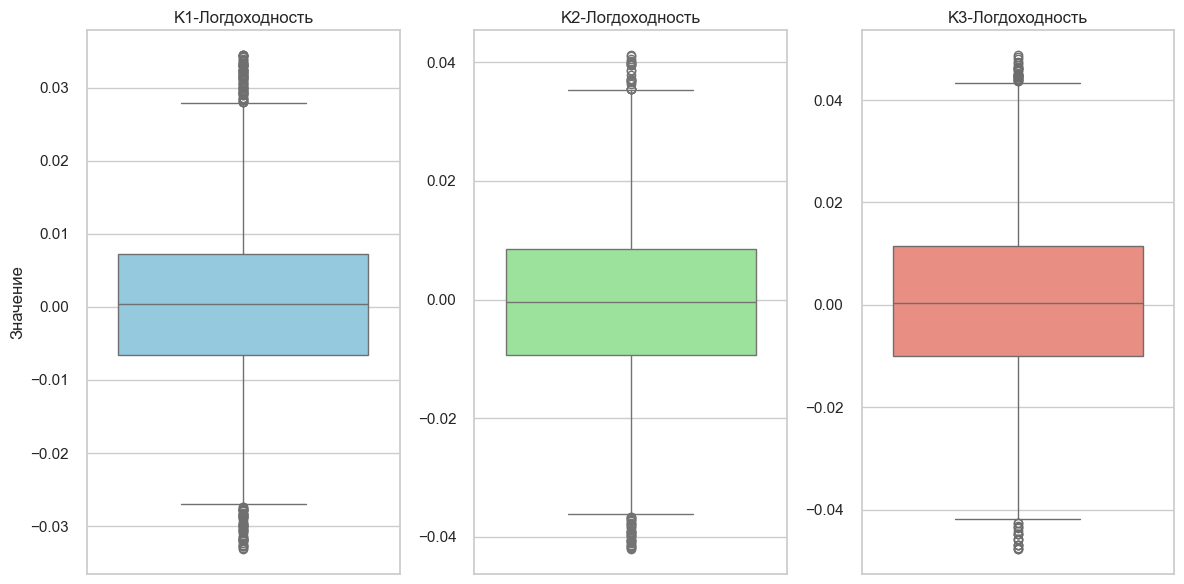

In [59]:
# Удаление выбросов логдоходности 
Q1 = np.quantile(LogIncom['K1-Логдох'], 0.25)
Q3 = np.quantile(LogIncom['K1-Логдох'], 0.75)
R = Q3 - Q1
L1 = Q1 - 1.5 * R
U1 = Q3 + 1.5 * R

Q1 = np.quantile(LogIncom['K2-Логдох'], 0.25)
Q3 = np.quantile(LogIncom['K2-Логдох'], 0.75)
R = Q3 - Q1
L2 = Q1 - 1.5 * R
U2 = Q3 + 1.5 * R

Q1 = np.quantile(LogIncom['K3-Логдох'], 0.25)
Q3 = np.quantile(LogIncom['K3-Логдох'], 0.75)
R = Q3 - Q1
L3 = Q1 - 1.5 * R
U3 = Q3 + 1.5 * R

LogIncomOut = LogIncom[LogIncom['K1-Логдох'] > L1]
LogIncomOut = LogIncomOut[LogIncomOut['K1-Логдох'] < U1]
LogIncomOut = LogIncomOut[LogIncomOut['K2-Логдох'] > L2]
LogIncomOut = LogIncomOut[LogIncomOut['K2-Логдох'] < U2]
LogIncomOut = LogIncomOut[LogIncomOut['K3-Логдох'] > L3]
LogIncomOut = LogIncomOut[LogIncomOut['K3-Логдох'] < U3]

print(f"Исходный размер: {len(LogIncom)}")
print(f"Размер после удаления выбросов: {len(LogIncomOut)}")

# Визуализация boxplot'ов
plt.figure(figsize=(12, 6))

# Первый боксплот
plt.subplot(1, 3, 1)  # 1 строка, 3 столбца, 1-й график
sns.boxplot(y=LogIncomOut["K1-Логдох"], color='skyblue')
plt.title("K1-Логдоходность")
plt.ylabel("Значение")

# Второй боксплот
plt.subplot(1, 3, 2)  # 1 строка, 3 столбца, 2-й график
sns.boxplot(y=LogIncomOut["K2-Логдох"], color='lightgreen')
plt.title("K2-Логдоходность")
plt.ylabel("")

# Третий боксплот
plt.subplot(1, 3, 3)  # 1 строка, 3 столбца, 3-й график
sns.boxplot(y=LogIncomOut["K3-Логдох"], color='salmon')
plt.title("K3-Логдоходность")
plt.ylabel("")

plt.tight_layout()  # Автоматическая регулировка отступов
plt.show()

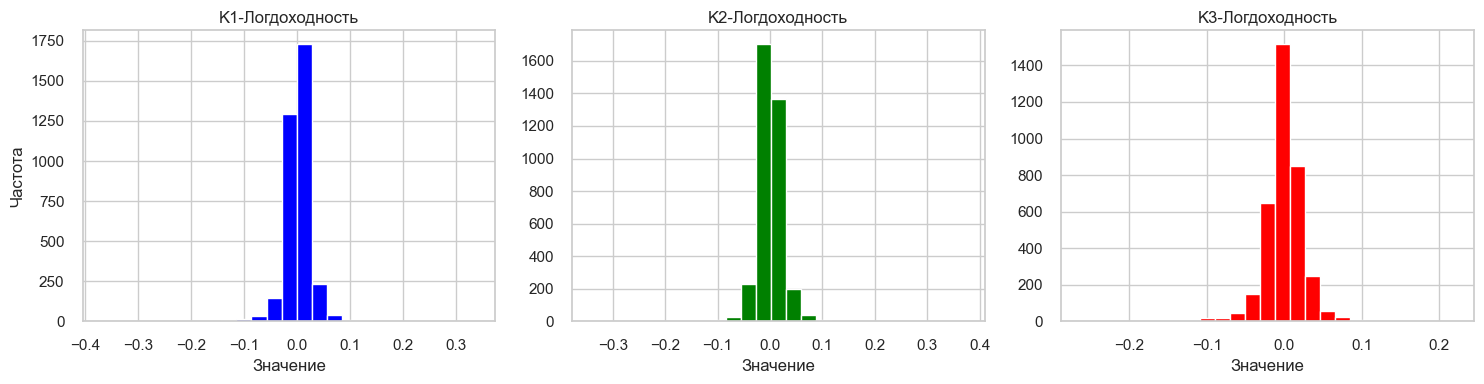

In [61]:
plt.figure(figsize=(15, 4))  

# График 1 - K1
plt.subplot(1, 3, 1)
plt.hist(K123["K1-Логдоходность"], bins=25, edgecolor='white', color='blue')
plt.title("K1-Логдоходность")
plt.xlabel("Значение")
plt.ylabel("Частота")

# График 2 - K2
plt.subplot(1, 3, 2)
plt.hist(K123["K2-Логдоходность"], bins=25, edgecolor='white', color='green')
plt.title("K2-Логдоходность")
plt.xlabel("Значение")

# График 3 - K3
plt.subplot(1, 3, 3)
plt.hist(K123["K3-Логдоходность"], bins=25, edgecolor='white', color='red')
plt.title("K3-Логдоходность")
plt.xlabel("Значение")

plt.tight_layout()
plt.show()


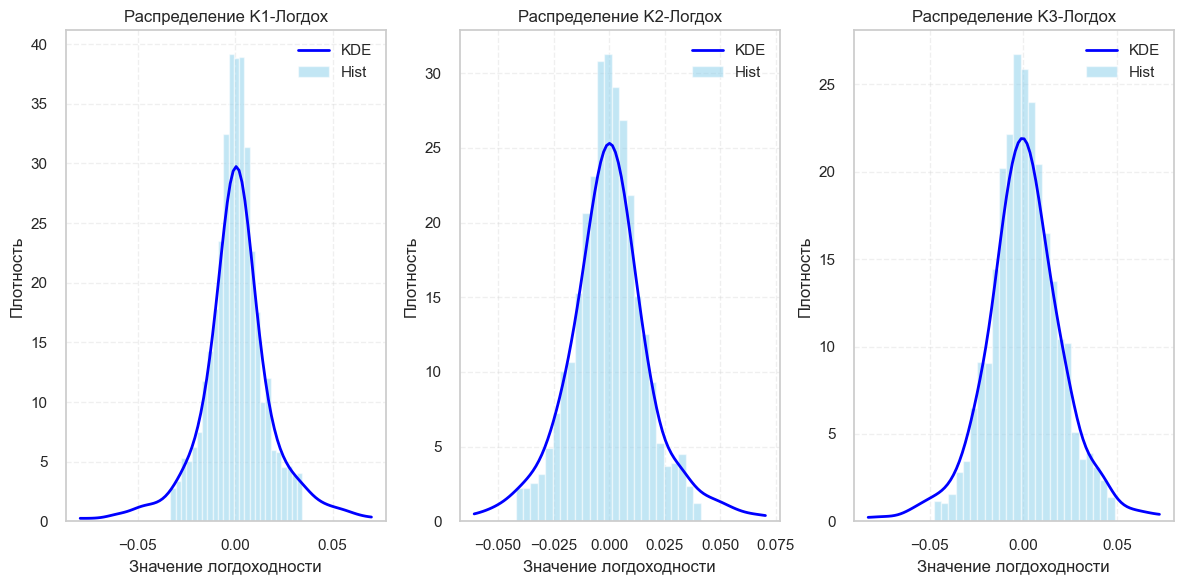

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

plt.figure(figsize=(12, 6))

# Создаем подграфики для всех трех логдоходностей
for i, col in enumerate(['K1-Логдох', 'K2-Логдох', 'K3-Логдох'], 1):
    plt.subplot(1, 3, i)
    
    # Вычисляем KDE
    data = LogIncom[col].dropna()
    xmin = np.quantile(data, 0.01)
    xmax = np.quantile(data, 0.99)
    x = np.linspace(xmin, xmax, 100)
    f_kernel = gaussian_kde(data)
    
    # Строим графики
    plt.plot(x, f_kernel(x), label='KDE', color='blue', linewidth=2)
    plt.hist(LogIncomOut[col], bins=25, edgecolor='white', 
             density=True, label='Hist', alpha=0.5, color='skyblue')
    
    # Настройки оформления
    plt.title(f'Распределение {col}')
    plt.xlabel('Значение логдоходности')
    plt.ylabel('Плотность')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend()

plt.tight_layout()
plt.show()

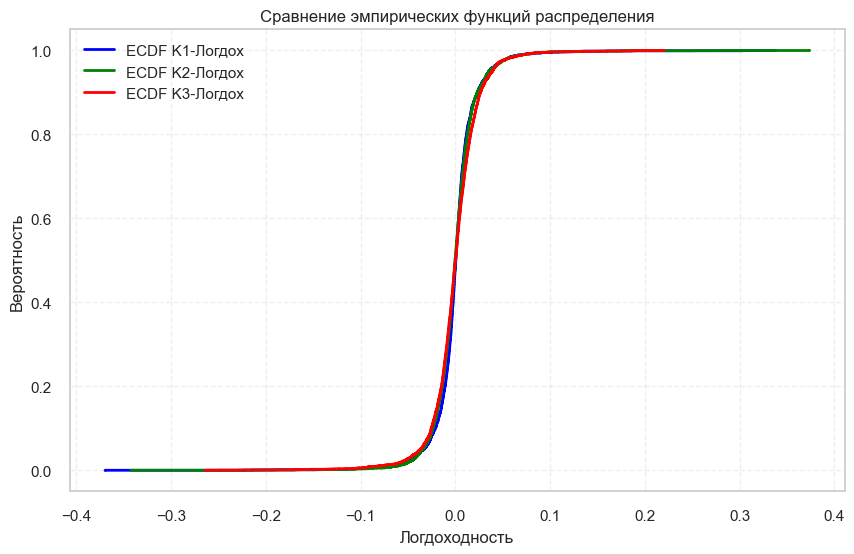

In [64]:
# Графики выборочной функции распределения
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']

for col, color in zip(['K1-Логдох', 'K2-Логдох', 'K3-Логдох'], colors):
    data = LogIncom[col].dropna()
    ecdf = ECDF(data)
    plt.step(ecdf.x, ecdf.y, where='post', linewidth=2, 
             label=f'ECDF {col}', color=color)

plt.title('Сравнение эмпирических функций распределения')
plt.xlabel('Логдоходность')
plt.ylabel('Вероятность')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Тест для K1:


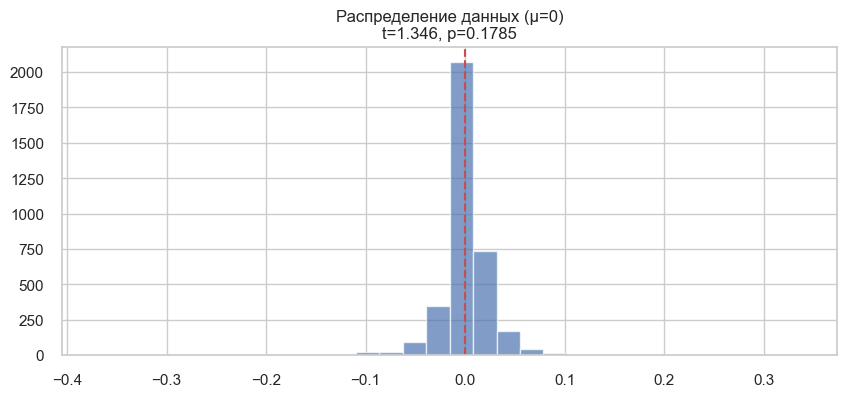

t=1.346, p=0.1785,  Не отвергаем H0

Тест для K2:


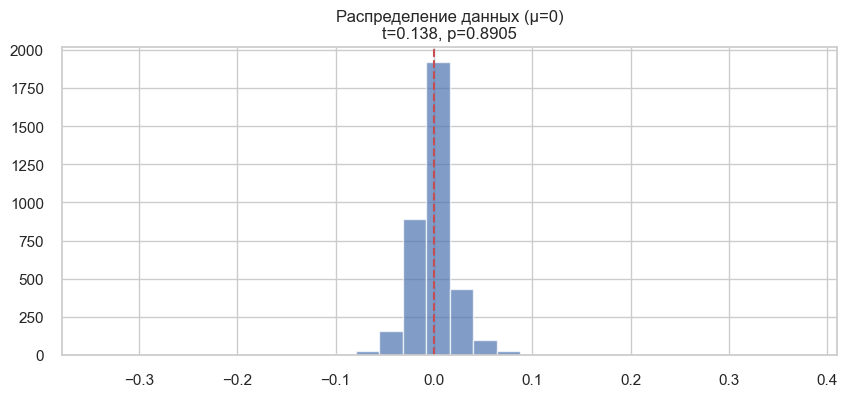

t=0.138, p=0.8905,  Не отвергаем H0

Тест для K3:


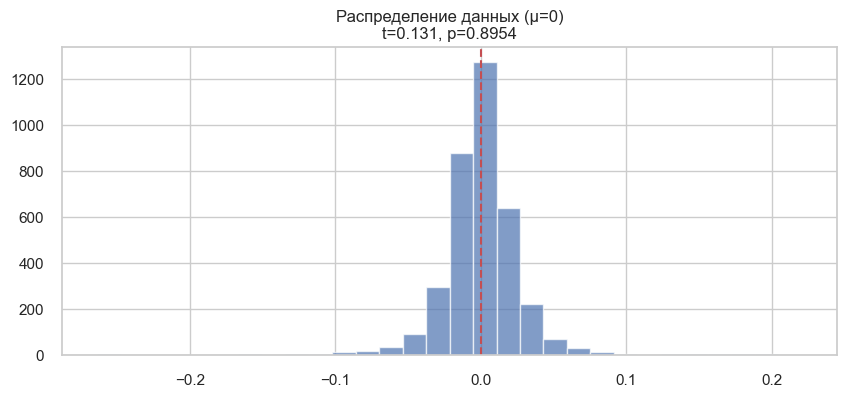

t=0.131, p=0.8954,  Не отвергаем H0


In [65]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp  # Для t-теста

# 1. Создаем или загружаем  K123

# 2. Создаем LogIncom на основе K123
LogIncom = K123[['K1-Логдоходность', 'K2-Логдоходность', 'K3-Логдоходность']].copy()

# 3. Функция для t-теста с визуализацией
def student_test(data, mu=0, viz=True):
    """
    Проводит одновыборочный t-тест
    data - выборка данных
    mu - тестируемое среднее значение (по умолчанию 0)
    viz - отображать график (True/False)
    """
    t_stat, p_value = ttest_1samp(data.dropna(), mu)
    
    if viz:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 4))
        plt.hist(data, bins=30, alpha=0.7)
        plt.axvline(x=mu, color='r', linestyle='--')
        plt.title(f"Распределение данных (μ={mu})\nt={t_stat:.3f}, p={p_value:.4f}")
        plt.show()
    
    result = "Отвергаем H0" if p_value < 0.05 else " Не отвергаем H0"
    return t_stat, p_value, result

# 4. Проверяем гипотезы для каждой компании
print("Тест для K1:")
t1, p1, res1 = student_test(LogIncom["K1-Логдоходность"].dropna(), viz=True)
print(f"t={t1:.3f}, p={p1:.4f}, {res1}\n")

print("Тест для K2:")
t2, p2, res2 = student_test(LogIncom["K2-Логдоходность"].dropna(), viz=True)
print(f"t={t2:.3f}, p={p2:.4f}, {res2}\n")

print("Тест для K3:")
t3, p3, res3 = student_test(LogIncom["K3-Логдоходность"].dropna(), viz=True)
print(f"t={t3:.3f}, p={p3:.4f}, {res3}")


K1 Логдоходность: K=0.139, p-value=0.001


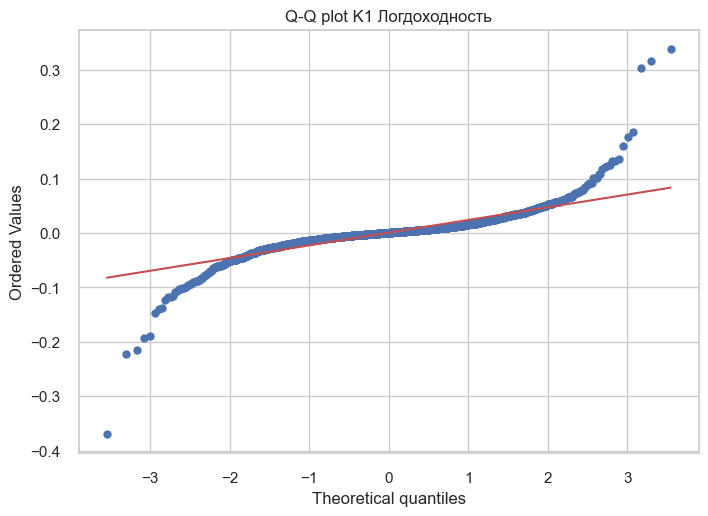

K2 Логдоходность: K=0.113, p-value=0.001


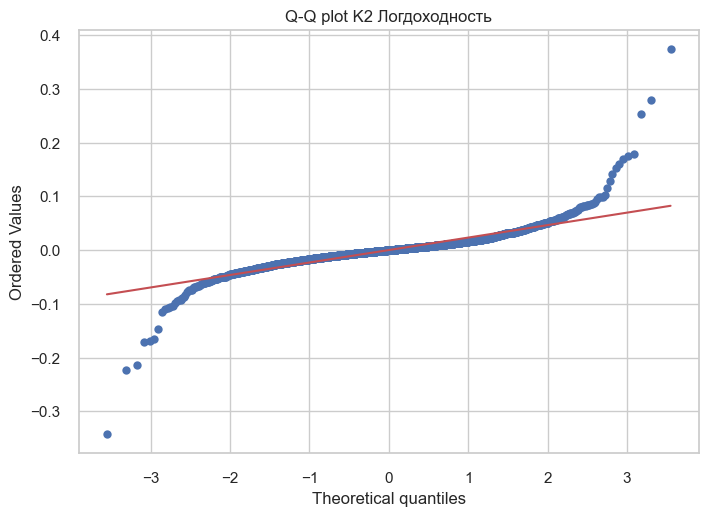

K3 Логдоходность: K=0.097, p-value=0.001


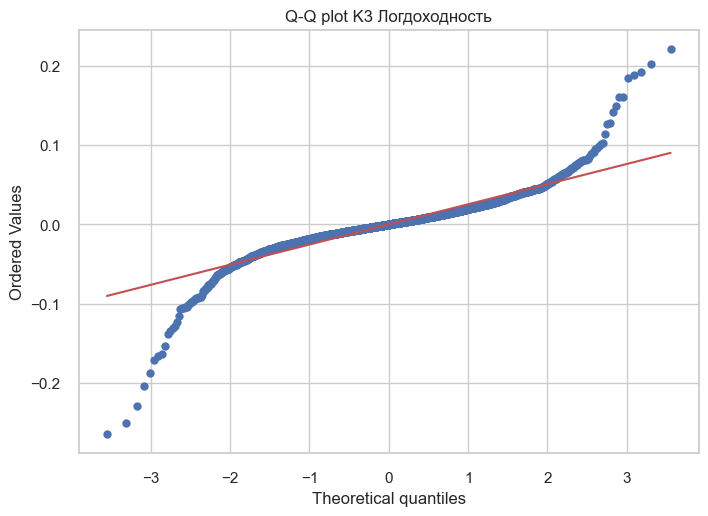

In [68]:
from statsmodels.stats.api import lilliefors
import scipy.stats as stats
import matplotlib.pyplot as plt

# Убедимся, что названия столбцов правильные
LogIncom = LogIncom.rename(columns={
    'K1-Логдох': 'K1-Логдоходность',
    'K2-Логдох': 'K2-Логдоходность',
    'K3-Логдох': 'K3-Логдоходность'
})

# Функция для проверки нормальности
def check_normality(data, name=""):
    """Проверка нормальности распределения"""
    # Тест Лиллиефорса
    k, p = lilliefors(data)
    print(f'{name}: K={k:.3f}, p-value={p:.3f}')
    
    # Q-Q график
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q plot {name}')
    plt.show()
    
    return p

# Проверяем нормальность для всех трех тикеров
for ticker in ['K1', 'K2', 'K3']:
    col = f'{ticker}-Логдоходность'
    if col in LogIncom.columns:
        check_normality(LogIncom[col].dropna(), f"{ticker} Логдоходность")
    else:
        print(f"Столбец {col} не найден")

In [69]:
# Аналитическая записка

# Основные статистики логдоходностей
# Все активы имеют близкие значения стандартного отклонения, что говорит о сопоставимом уровне риска.
# Средние значения положительные, но очень близки к нулю — высокая волатильность при низкой ожидаемой доходности.

# Диаграмма риск-доходность (Парето)
# На диаграмме Парето визуализированы риски и доходности активов:
# K1 — умеренный риск, наибольшая ожидаемая доходность.
# K2 — наименьший риск среди трёх.
# K3 — чуть более рискованный, чем K2, с немного большей доходностью.

# Проверка гипотез о средних значениях логдоходностей (t-тест)
# Все активы показали, что их средние доходности статистически почти не отличаются от нуля, что типично для эффективных рынков с высокой волатильностью.

# Проверка нормальности распределения
# тест показал значительные отклонения от нормального распределения по всем активам. Это подтверждается Q-Q графиками: наблюдаются «тяжёлые хвосты» и отклонения на концах распределений.

# Выбросы
# Исходный размер: 3492 наблюдений.
# После удаления выбросов: 2923 наблюдений.
# # Удалено 569 выбросов (примерно 16.3% данных).
# K1: Значения колеблются в диапазоне от -0.04 до 0.04, что типично для логарифмических доходностей.
# K2: Наиболее стабильный (диапазон ±0.04)
# K3: Наиболее стабильный (диапазон ±0.04) 


                         
# Общие выводы
# Все три актива имеют слабо положительную среднюю логдоходность, при этом:
# K1 показывает наивысшую среднюю доходность среди трёх.
# K2 — наименее доходный.
# K3 — умеренно доходный, между K1 и K2.
# Риск (волатильность)
# Уровень риска по активам сопоставим:
# K1 и K3 обладают несколько большей волатильностью, чем K2.
# K2 — наиболее стабильный актив, с минимальным стандартным отклонением.

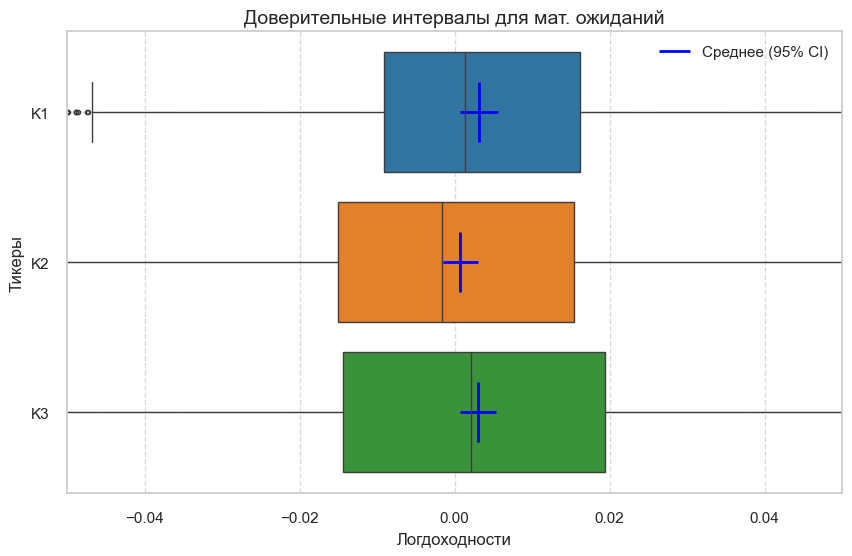

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Загрузка данных из текстовых файлов
K1 = pd.read_csv('K1.txt', sep=';', header=0)
K2 = pd.read_csv('K2.txt', sep=';', header=0)
K3 = pd.read_csv('K3.txt', sep=';', header=0)

# Предобработка данных
# Удаление ненужных столбцов
K1 = K1.drop(['<TICKER>', '<PER>', '<TIME>'], axis=1)
K2 = K2.drop(['<TICKER>', '<PER>', '<TIME>'], axis=1)
K3 = K3.drop(['<TICKER>', '<PER>', '<TIME>'], axis=1)

# Переименование столбцов
K1.rename(columns={'<DATE>': 'Дата', '<CLOSE>': 'K1-Цена', '<VOL>': 'K1-Объем'}, inplace=True)
K2.rename(columns={'<DATE>': 'Дата', '<CLOSE>': 'K2-Цена', '<VOL>': 'K2-Объем'}, inplace=True)
K3.rename(columns={'<DATE>': 'Дата', '<CLOSE>': 'K3-Цена', '<VOL>': 'K3-Объем'}, inplace=True)

# Преобразование цен в числовой формат (K2-Цена имеет запятые)
K1['K1-Цена'] = pd.to_numeric(K1['K1-Цена'], errors='coerce')
K2['K2-Цена'] = pd.to_numeric(K2['K2-Цена'].str.replace(',', '.'), errors='coerce')
K3['K3-Цена'] = pd.to_numeric(K3['K3-Цена'], errors='coerce')

# Удаление строк с нулевым объёмом (как в твоём коде)
K1['K1-Объем'].replace(0, np.nan, inplace=True)
K1.dropna(axis=0, inplace=True)
K2['K2-Объем'].replace(0, np.nan, inplace=True)
K2.dropna(axis=0, inplace=True)
K3['K3-Объем'].replace(0, np.nan, inplace=True)
K3.dropna(axis=0, inplace=True)

# Объединение таблиц по дате
K123 = K1[['Дата', 'K1-Цена']].merge(K2[['Дата', 'K2-Цена']], on='Дата', how='inner').merge(K3[['Дата', 'K3-Цена']], on='Дата', how='inner')

# Расчёт логдоходностей
log_returns = pd.DataFrame()
log_returns['K1-Логдоходность'] = np.log(K123['K1-Цена'] / K123['K1-Цена'].shift(1))
log_returns['K2-Логдоходность'] = np.log(K123['K2-Цена'] / K123['K2-Цена'].shift(1))
log_returns['K3-Логдоходность'] = np.log(K123['K3-Цена'] / K123['K3-Цена'].shift(1))
log_returns = log_returns.dropna()  # Удаление первых строк с NaN

# Удаление выбросов (на основе ±3 стандартных отклонений)
for column in log_returns.columns:
    mean = log_returns[column].mean()
    std = log_returns[column].std()
    log_returns = log_returns[(log_returns[column] > mean - 3 * std) & (log_returns[column] < mean + 3 * std)]

# Расчёт доверительных интервалов (95%) для мат. ожиданий
confidence_intervals = {}
for ticker in log_returns.columns:
    data = log_returns[ticker]
    mean = data.mean()
    std_err = stats.sem(data)  # Стандартная ошибка среднего
    ci = stats.norm.interval(0.95, loc=mean, scale=std_err)  # 95%-й доверительный интервал
    confidence_intervals[ticker] = {'mean': mean, 'lower': ci[0], 'upper': ci[1]}

# Построение графика
plt.figure(figsize=(10, 6))

# Ящик с усами
sns.boxplot(data=log_returns, orient='h', palette=['#1f77b4', '#ff7f0e', '#2ca02c'], fliersize=3)

# Добавление доверительных интервалов
for i, ticker in enumerate(log_returns.columns):
    mean = confidence_intervals[ticker]['mean']
    lower = confidence_intervals[ticker]['lower']
    upper = confidence_intervals[ticker]['upper']
    
    # Вертикальная линия для среднего (синяя)
    plt.vlines(mean, i - 0.2, i + 0.2, color='blue', linestyle='-', linewidth=2, label='Среднее (95% CI)' if i == 0 else "")
    # Горизонтальная линия для доверительного интервала (синяя)
    plt.hlines(i, lower, upper, color='blue', linestyle='-', linewidth=2)

# Настройка графика
plt.xlabel('Логдоходности', fontsize=12)
plt.ylabel('Тикеры', fontsize=12)
plt.title('Доверительные интервалы для мат. ожиданий', fontsize=14)
plt.yticks(range(len(log_returns.columns)), ['K1', 'K2', 'K3'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(-0.05, 0.05)  # Диапазон на основе твоего примера

# Показать график
plt.show()

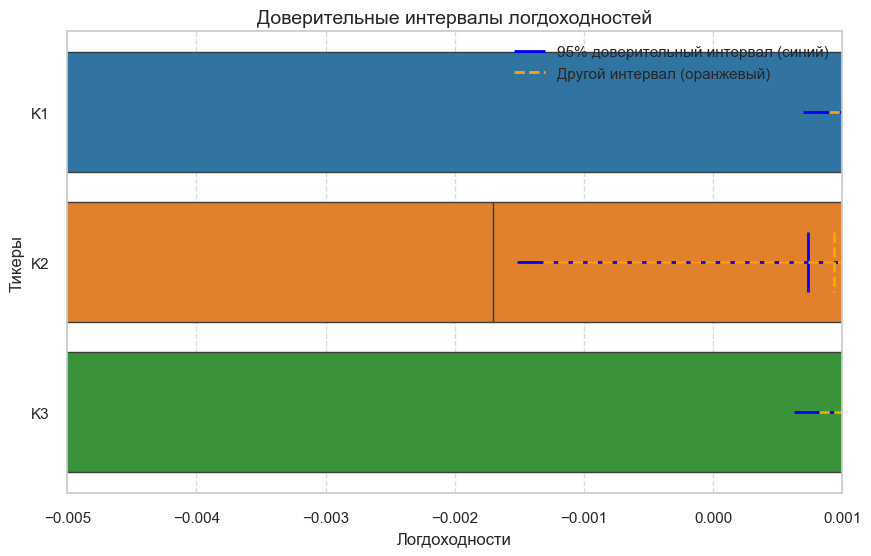

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Загрузка данных из текстовых файлов
K1 = pd.read_csv('K1.txt', sep=';', header=0)
K2 = pd.read_csv('K2.txt', sep=';', header=0)
K3 = pd.read_csv('K3.txt', sep=';', header=0)

# Предобработка данных
# Удаление ненужных столбцов
K1 = K1.drop(['<TICKER>', '<PER>', '<TIME>'], axis=1)
K2 = K2.drop(['<TICKER>', '<PER>', '<TIME>'], axis=1)
K3 = K3.drop(['<TICKER>', '<PER>', '<TIME>'], axis=1)

# Переименование столбцов
K1.rename(columns={'<DATE>': 'Дата', '<CLOSE>': 'K1-Цена', '<VOL>': 'K1-Объем'}, inplace=True)
K2.rename(columns={'<DATE>': 'Дата', '<CLOSE>': 'K2-Цена', '<VOL>': 'K2-Объем'}, inplace=True)
K3.rename(columns={'<DATE>': 'Дата', '<CLOSE>': 'K3-Цена', '<VOL>': 'K3-Объем'}, inplace=True)

# Преобразование цен в числовой формат (K2-Цена имеет запятые)
K1['K1-Цена'] = pd.to_numeric(K1['K1-Цена'], errors='coerce')
K2['K2-Цена'] = pd.to_numeric(K2['K2-Цена'].str.replace(',', '.'), errors='coerce')
K3['K3-Цена'] = pd.to_numeric(K3['K3-Цена'], errors='coerce')

# Удаление строк с нулевым объёмом
K1['K1-Объем'].replace(0, np.nan, inplace=True)
K1.dropna(axis=0, inplace=True)
K2['K2-Объем'].replace(0, np.nan, inplace=True)
K2.dropna(axis=0, inplace=True)
K3['K3-Объем'].replace(0, np.nan, inplace=True)
K3.dropna(axis=0, inplace=True)

# Объединение таблиц по дате
K123 = K1[['Дата', 'K1-Цена']].merge(K2[['Дата', 'K2-Цена']], on='Дата', how='inner').merge(K3[['Дата', 'K3-Цена']], on='Дата', how='inner')

# Расчёт логдоходностей
log_returns = pd.DataFrame()
log_returns['K1-Логдоходность'] = np.log(K123['K1-Цена'] / K123['K1-Цена'].shift(1))
log_returns['K2-Логдоходность'] = np.log(K123['K2-Цена'] / K123['K2-Цена'].shift(1))
log_returns['K3-Логдоходность'] = np.log(K123['K3-Цена'] / K123['K3-Цена'].shift(1))
log_returns = log_returns.dropna()

# Удаление выбросов (±3 стандартных отклонения)
for column in log_returns.columns:
    mean = log_returns[column].mean()
    std = log_returns[column].std()
    log_returns = log_returns[(log_returns[column] > mean - 3 * std) & (log_returns[column] < mean + 3 * std)]

# Расчёт доверительных интервалов (95%) для мат. ожиданий
confidence_intervals = {}
for ticker in log_returns.columns:
    data = log_returns[ticker]
    mean = data.mean()
    std_err = stats.sem(data)
    ci = stats.norm.interval(0.95, loc=mean, scale=std_err)
    confidence_intervals[ticker] = {'mean': mean, 'lower': ci[0], 'upper': ci[1]}

# Построение графика
plt.figure(figsize=(10, 6))

# Ящик с усами
sns.boxplot(data=log_returns, orient='h', palette=['#1f77b4', '#ff7f0e', '#2ca02c'], fliersize=3)

# Добавление доверительных интервалов
for i, ticker in enumerate(log_returns.columns):
    mean = confidence_intervals[ticker]['mean']
    lower = confidence_intervals[ticker]['lower']
    upper = confidence_intervals[ticker]['upper']
    
    # Синяя линия (95% доверительный интервал)
    plt.vlines(mean, i - 0.2, i + 0.2, color='blue', linestyle='-', linewidth=2, label='95% доверительный интервал (синий)' if i == 0 else "")
    plt.hlines(i, lower, upper, color='blue', linestyle='-', linewidth=2)
    
    # Оранжевая линия (пример "Другой интервал", с небольшим смещением для наглядности)
    # Если у тебя есть данные для второго интервала, замени здесь
    offset = 0.0002  # Небольшое смещение для наглядности
    plt.vlines(mean + offset, i - 0.2, i + 0.2, color='orange', linestyle='--', linewidth=2, label='Другой интервал (оранжевый)' if i == 0 else "")
    plt.hlines(i, lower + offset, upper + offset, color='orange', linestyle='--', linewidth=2)

# Настройка графика
plt.xlabel('Логдоходности', fontsize=12)
plt.ylabel('Тикеры', fontsize=12)
plt.title('Доверительные интервалы логдоходностей', fontsize=14)
plt.yticks(range(len(log_returns.columns)), ['K1', 'K2', 'K3'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(-0.005, 0.001)  # Диапазон как в целевом графике

# Показать график
plt.show()